# Import important libraries

In [11]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from astropy.table import Table
from sklearn.metrics import r2_score

# Downloading the dataset

In [12]:
std = pd.read_csv("student-por.csv.xls")
std.head(30)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>],
       [<AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'Dalc'}>,
        <AxesSubplot:title={'center':'Walc'}>,
        <AxesSubplot:title={'center':'health'}>],
       [<AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>,
        <AxesSubplot:title={'center':'G3'}>]], dtype=object)

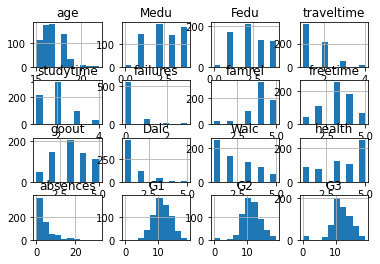

In [13]:
std.info()
std.hist()

In [14]:
std["age"].value_counts()

17    179
16    177
18    140
15    112
19     32
20      6
21      2
22      1
Name: age, dtype: int64

In [15]:
std["Medu"].value_counts()

2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64

In [16]:
std["Fedu"].value_counts()

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

In [17]:
std["school"].value_counts()

GP    423
MS    226
Name: school, dtype: int64

In [18]:
std["Mjob"].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [19]:
std["G1"].describe()

count    649.000000
mean      11.399076
std        2.745265
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

In [20]:
std["G2"].describe()

count    649.000000
mean      11.570108
std        2.913639
min        0.000000
25%       10.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G2, dtype: float64

In [21]:
std

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [22]:
std["sex"].describe()

count     649
unique      2
top         F
freq      383
Name: sex, dtype: object

In [23]:
# mapping strings to numeric values:
def numerical_data():
    std['school'] = std['school'].map({'GP': 0, 'MS': 1})
    std['sex'] = std['sex'].map({'M': 0, 'F': 1})
    std['address'] = std['address'].map({'U': 0, 'R': 1})
    std['famsize'] = std['famsize'].map({'LE3': 0, 'GT3': 1})
    std['Pstatus'] = std['Pstatus'].map({'T': 0, 'A': 1})
    std['Mjob'] = std['Mjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    std['Fjob'] = std['Fjob'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
    std['reason'] =std['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
    std['guardian'] = std['guardian'].map({'mother': 0, 'father': 1, 'other': 2})
    std['schoolsup'] = std['schoolsup'].map({'no': 0, 'yes': 1})
    std['famsup'] =std['famsup'].map({'no': 0, 'yes': 1})
    std['paid'] = std['paid'].map({'no': 0, 'yes': 1})
    std['activities'] = std['activities'].map({'no': 0, 'yes': 1})
    std['nursery'] = std['nursery'].map({'no': 0, 'yes': 1})
    std['higher'] = std['higher'].map({'no': 0, 'yes': 1})
    std['internet'] = std['internet'].map({'no': 0, 'yes': 1})
    std['romantic'] = std['romantic'].map({'no': 0, 'yes' : 1})
   # std['passed'] = std['passed'].map({'no': 0, 'yes': 1})
    # reorder dataframe columns :
   # col = std['passed']
   # del std['passed']
  #  std['passed'] = col

    
# feature scaling will allow the algorithm to converge faster, large data will have same scal
def feature_scaling(df):
    for i in std:
            col = std[i]
        # let's choose columns that have large values
    if(np.max(col)>6):
                Max = max(col)
                Min = min(col)
                mean = np.mean(col)
                col  = (col-mean)/(Max)
                std[i] = col
            
    elif(np.max(col)<6):
                col = (col-np.min(col))
                col /= np.max(col)
                std[i] = col


In [24]:
# All values in numerical after calling numerical_data() function
numerical_data()
std

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


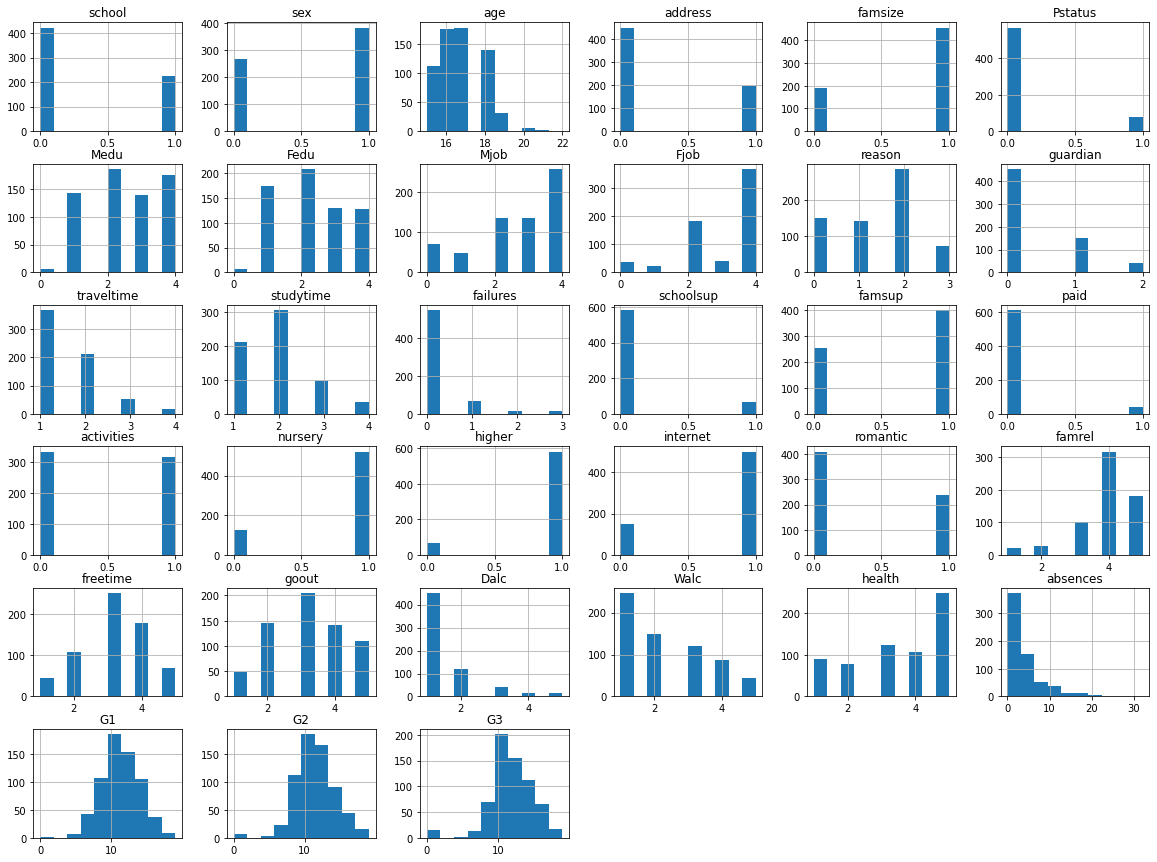

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
std.hist(bins=10, figsize=(20,15))
plt.show()

In [26]:
std_one=std.copy()

In [27]:
std

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,1,18,0,1,1,4,4,3,0,...,4,3,4,1,1,3,4,0,11,11
1,0,1,17,0,1,0,1,1,3,4,...,5,3,3,1,1,3,2,9,11,11
2,0,1,15,0,0,0,1,1,3,4,...,4,3,2,2,3,3,6,12,13,12
3,0,1,15,0,1,0,4,2,1,2,...,3,2,2,1,1,5,0,14,14,14
4,0,1,16,0,1,0,3,3,4,4,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,5,4,2,1,2,5,4,10,11,10
645,1,1,18,0,0,0,3,1,0,2,...,4,3,4,1,1,1,4,15,15,16
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,1,1,5,6,11,12,9
647,1,0,17,0,0,0,3,1,2,2,...,2,4,5,3,4,2,6,10,10,10


In [115]:
len(X_train)

519

In [116]:
print('X_train :')
print(X_train.head())
print(X_train.shape)
print(' ')

X_train :
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
538       1    1   16        1        0        0     2     2     4     4  ...   
411       0    0   17        0        0        1     4     4     1     4  ...   
546       1    1   17        0        1        0     4     4     1     1  ...   
565       1    0   16        1        0        0     1     1     3     4  ...   
93        0    1   16        0        1        0     4     2     0     2  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
538         1       4         3      3     2     2       5         2  11  11  
411         0       4         4      2     1     2       4         2  12  15  
546         0       5         2      5     1     1       5         0  13  15  
565         0       4         5      5     2     4       5         0  10  10  
93          0       5         3      3     1     1       1         2  13  14  

[5 rows x 32 columns]
(519, 

In [117]:
print('X_test :')
print(X_test.head())
print(X_test.shape)
print(' ')

X_test :
     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
482       1    1   15        1        0        0     1     1     3     4  ...   
167       0    1   17        0        1        0     4     4     4     0  ...   
339       0    0   18        1        0        0     3     2     2     4  ...   
350       0    0   19        1        0        0     2     1     3     2  ...   
390       0    1   18        1        1        0     2     2     3     4  ...   

     romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  
482         1       5         2      1     1     3       4         0   9  10  
167         1       4         2      1     1     1       4         0  13  13  
339         0       5         4      2     1     1       4         0  14  15  
350         1       4         3      1     1     1       5         0   9  10  
390         0       4         4      4     1     1       4         6  14  13  

[5 rows x 32 columns]
(130, 3

In [118]:
print('y_train :')
print(y_train.head())
print(y_train.shape)
print(' ')

y_train :
538    11
411    15
546    16
565     9
93     14
Name: G3, dtype: int64
(519,)
 


In [119]:
print('y_test :')
print(y_test.head())
print(y_test.shape)
print(' ')

y_test :
482     9
167    13
339    15
350    11
390    14
Name: G3, dtype: int64
(130,)
 


9     103
10     86
8      83
11     80
7      72
12     54
6      40
13     38
14     25
5      23
15     20
16     14
4       3
17      1
18      0
0       0
1       0
3       0
2       0
19      0
Name: G1_cat, dtype: int64

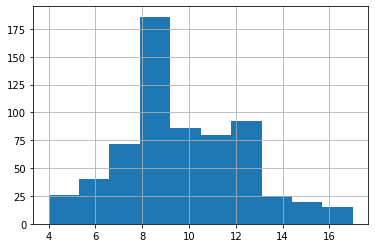

In [120]:
std["G1_cat"] = pd.cut(std["G2"], bins=[0, 1, 2, 3, 4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], labels=[0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
std["G1_cat"].describe()
std["G1_cat"].hist()
std["G1_cat"].value_counts()

9     103
10     86
8      83
11     80
7      72
12     54
6      40
13     38
14     25
5      23
15     20
16     14
4       3
17      1
18      0
0       0
1       0
3       0
2       0
19      0
Name: G2_cat, dtype: int64

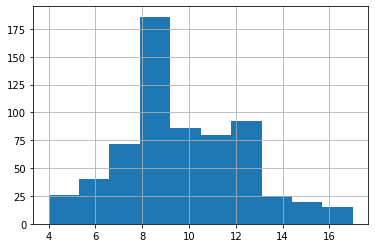

In [121]:
std["G2_cat"] = pd.cut(std["G2"], bins=[0, 1, 2, 3, 4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21], labels=[0,1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
std["G2_cat"].describe()
std["G2_cat"].hist()
std["G2_cat"].value_counts()

In [122]:

std


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G1_cat,G2_cat
0,0,1,18,0,1,1,4,4,3,0,...,4,1,1,3,4,0,11,11,9,9
1,0,1,17,0,1,0,1,1,3,4,...,3,1,1,3,2,9,11,11,9,9
2,0,1,15,0,0,0,1,1,3,4,...,2,2,3,3,6,12,13,12,11,11
3,0,1,15,0,1,0,4,2,1,2,...,2,1,1,5,0,14,14,14,12,12
4,0,1,16,0,1,0,3,3,4,4,...,2,1,2,5,0,11,13,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,2,1,2,5,4,10,11,10,9,9
645,1,1,18,0,0,0,3,1,0,2,...,4,1,1,1,4,15,15,16,13,13
646,1,1,18,0,1,0,1,1,4,4,...,1,1,1,5,6,11,12,9,10,10
647,1,0,17,0,0,0,3,1,2,2,...,5,3,4,2,6,10,10,10,8,8


In [30]:
corr_matrix = std.corr()
corr_matrix

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,0.083050,0.087170,0.354520,-0.022252,-0.028120,-0.254787,-0.209806,0.151608,0.018211,...,-0.031597,0.034666,0.044632,0.047169,0.014169,-0.058599,-0.163933,-0.292626,-0.269776,-0.284294
sex,0.083050,1.000000,0.043662,0.025503,0.098205,0.064700,-0.119127,-0.083913,0.114223,0.054325,...,-0.083473,-0.146305,-0.058178,-0.282696,-0.320785,-0.139547,-0.021336,0.104109,0.104005,0.129077
age,0.087170,0.043662,1.000000,0.025848,0.002470,0.005631,-0.107832,-0.121050,0.096202,0.094789,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,0.354520,0.025503,0.025848,1.000000,0.046113,-0.094635,-0.190320,-0.141493,0.128512,0.069587,...,0.033897,0.036647,-0.015475,0.047304,0.012416,-0.003787,-0.073653,-0.157127,-0.154600,-0.167637
famsize,-0.022252,0.098205,0.002470,0.046113,1.000000,-0.239608,0.014325,0.039538,0.059604,-0.045834,...,-0.004641,0.021257,0.004312,-0.060482,-0.081958,-0.002448,-0.004645,-0.047230,-0.038891,-0.045016
Pstatus,-0.028120,0.064700,0.005631,-0.094635,-0.239608,1.000000,0.057174,0.031856,0.025812,0.057947,...,-0.051303,-0.037585,-0.031086,-0.041513,-0.070976,-0.012638,0.117492,-0.015251,-0.018689,0.000754
Medu,-0.254787,-0.119127,-0.107832,-0.190320,0.014325,0.057174,1.000000,0.647477,-0.536829,-0.236021,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.209806,-0.083913,-0.121050,-0.141493,0.039538,0.031856,0.647477,1.000000,-0.376360,-0.363574,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,0.151608,0.114223,0.096202,0.128512,0.059604,0.025812,-0.536829,-0.376360,1.000000,0.313979,...,-0.002603,-0.045453,0.012780,-0.011831,-0.059446,-0.067353,0.054078,-0.169317,-0.158552,-0.166790
Fjob,0.018211,0.054325,0.094789,0.069587,-0.045834,0.057947,-0.236021,-0.363574,0.313979,1.000000,...,0.013539,0.040034,0.039938,-0.039808,0.006927,0.008617,0.041174,-0.093530,-0.085288,-0.065454


<AxesSubplot:xlabel='G1', ylabel='studytime'>

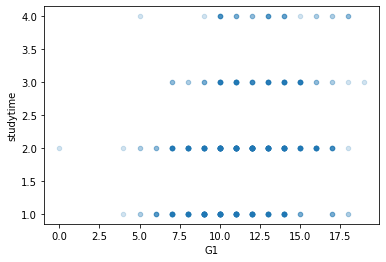

In [31]:
std.plot(kind="scatter", x="G1", y="studytime", alpha=.2)

<AxesSubplot:xlabel='G1', ylabel='failures'>

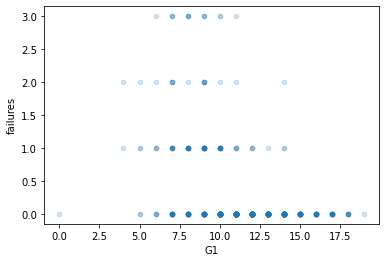

In [32]:
std.plot(kind="scatter", x="G1", y="failures", alpha=.2)

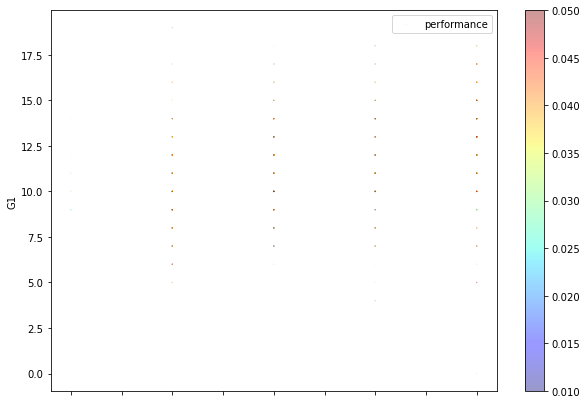

In [33]:
std.plot(kind="scatter", x="Medu", y="G1", alpha=0.4, s=std["health"]/100, label="performance", figsize=(10,7),
c=std['famrel']/100, cmap=plt.get_cmap("jet"), colorbar=True, )
plt.legend()

In [34]:
corr_matrix["G1"].sort_values(ascending=False)

G1            1.000000
G2            0.864982
G3            0.826387
higher        0.349030
studytime     0.260875
Medu          0.260472
Fedu          0.217501
internet      0.139931
sex           0.104109
activities    0.080123
famrel        0.048795
famsup        0.038255
nursery       0.031172
Pstatus      -0.015251
guardian     -0.046779
famsize      -0.047230
health       -0.051647
paid         -0.062784
schoolsup    -0.071779
goout        -0.074053
romantic     -0.074973
Fjob         -0.093530
freetime     -0.094497
absences     -0.147149
reason       -0.151003
traveltime   -0.154120
Walc         -0.155649
address      -0.157127
Mjob         -0.169317
age          -0.174322
Dalc         -0.195171
school       -0.292626
failures     -0.384210
Name: G1, dtype: float64

In [35]:
corr_matrix["G2"].sort_values(ascending=False)

G2            1.000000
G3            0.918548
G1            0.864982
higher        0.331953
Medu          0.264035
studytime     0.240498
Fedu          0.225139
internet      0.147909
sex           0.104005
famrel        0.089588
activities    0.067154
nursery       0.039867
famsup        0.038141
Pstatus      -0.018689
paid         -0.033925
famsize      -0.038891
guardian     -0.044246
schoolsup    -0.056624
goout        -0.079469
health       -0.082179
Fjob         -0.085288
romantic     -0.097937
freetime     -0.106678
age          -0.107119
absences     -0.124745
reason       -0.146615
traveltime   -0.154489
address      -0.154600
Mjob         -0.158552
Walc         -0.164852
Dalc         -0.189480
school       -0.269776
failures     -0.385782
Name: G2, dtype: float64

In [36]:
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
internet      0.150025
sex           0.129077
famrel        0.063361
activities    0.059791
famsup        0.059206
nursery       0.028752
Pstatus       0.000754
guardian     -0.029474
famsize      -0.045016
paid         -0.054898
Fjob         -0.065454
schoolsup    -0.066405
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
reason       -0.157546
Mjob         -0.166790
address      -0.167637
Walc         -0.176619
Dalc         -0.204719
school       -0.284294
failures     -0.393316
Name: G3, dtype: float64

array([[<AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='higher', ylabel='G1'>,
        <AxesSubplot:xlabel='studytime', ylabel='G1'>],
       [<AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='higher', ylabel='G2'>,
        <AxesSubplot:xlabel='studytime', ylabel='G2'>],
       [<AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='higher', ylabel='G3'>,
        <AxesSubplot:xlabel='studytime', ylabel='G3'>],
       [<AxesSubplot:xlabel='G1', ylabel='higher'>,
        <AxesSubplot:xlabel='G2', ylabel='higher'>,
        <AxesSubplot:xlabel='G3', ylabel='higher'>,
        <AxesSubplot:xlabel='higher', ylabel='higher'>,
        <AxesSubplot:xlabel='stu

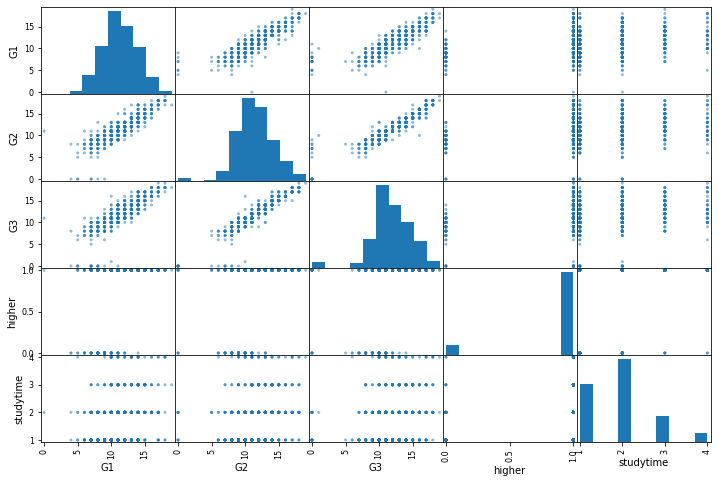

In [126]:
from pandas.plotting import scatter_matrix
attributes = ["G1", "G2","G3", "higher", "studytime"]
scatter_matrix(std[attributes], figsize=(12, 8))

In [125]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy

In [42]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [175]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression',
                      'Random Forest', 'SVM',
                       'Gradient Boosted']
   # X_train = X_train.drop('G3', axis='columns')
   # X_test = X_test.drop('G3', axis='columns')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = RandomForestRegressor(n_estimators=100)
    model3 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model4 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    
    
    
    return results

In [176]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,0.740115,1.075876
Random Forest,0.836308,1.194892
SVM,0.998736,1.567573
Gradient Boosted,0.787112,1.12771


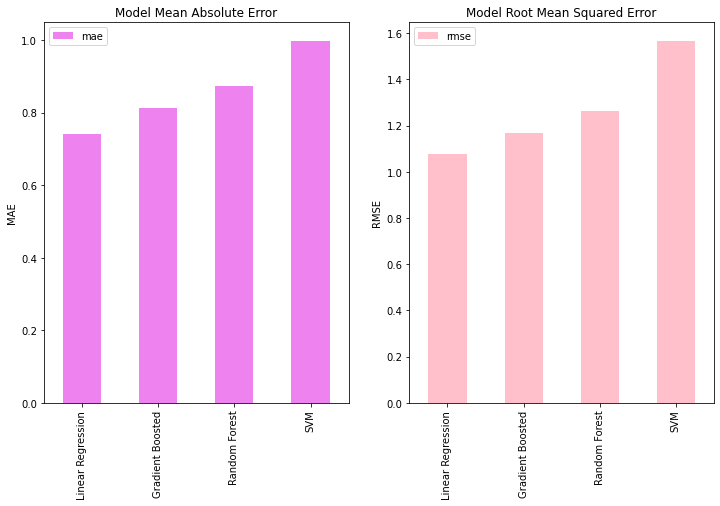

In [51]:
plt.figure(figsize=(12, 7))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'violet', ax = ax)
plt.title('Model Mean Absolute Error') 
plt.ylabel('MAE')

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'pink', ax = ax)
plt.title('Model Root Mean Squared Error') 
plt.ylabel('RMSE')

plt.show()

In [52]:
XX=std['G2']
YY=std['G3']

Text(0, 0.5, 'G3')

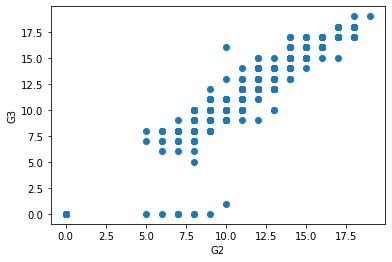

In [53]:
import matplotlib.pyplot as plt
plt.scatter(XX,YY)
plt.xlabel("G2")
plt.ylabel("G3")

In [54]:
X1=std['G1']
Y1=std['G3']

Text(0, 0.5, 'G3')

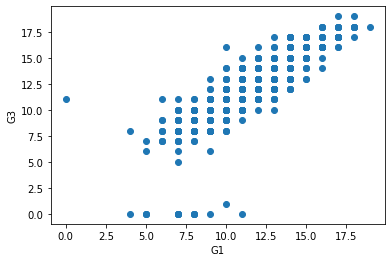

In [55]:
import matplotlib.pyplot as plt
plt.scatter(X1,Y1)
plt.xlabel("G1")
plt.ylabel("G3")

# Linear Regrision


In [46]:
x=std.drop(columns='G3')
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,18,0,1,1,4,4,3,0,...,0,4,3,4,1,1,3,4,0,11
1,0,1,17,0,1,0,1,1,3,4,...,0,5,3,3,1,1,3,2,9,11
2,0,1,15,0,0,0,1,1,3,4,...,0,4,3,2,2,3,3,6,12,13
3,0,1,15,0,1,0,4,2,1,2,...,1,3,2,2,1,1,5,0,14,14
4,0,1,16,0,1,0,3,3,4,4,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1,19,1,1,0,2,3,2,4,...,0,5,4,2,1,2,5,4,10,11
645,1,1,18,0,0,0,3,1,0,2,...,0,4,3,4,1,1,1,4,15,15
646,1,1,18,0,1,0,1,1,4,4,...,0,1,1,1,1,1,5,6,11,12
647,1,0,17,0,0,0,3,1,2,2,...,0,2,4,5,3,4,2,6,10,10


In [47]:
y=std['G3']
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23,shuffle=True)

In [86]:
x_train, x_val, Y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [88]:
x_val

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
407,0,1,21,0,0,0,4,4,4,4,...,0,3,3,2,1,1,5,0,9,12
509,1,1,16,1,0,0,1,1,3,4,...,0,5,3,2,1,1,1,0,16,17
422,0,1,18,0,1,0,3,2,2,4,...,1,3,1,2,1,2,1,4,10,13
193,0,0,17,0,1,0,4,3,4,4,...,1,5,2,3,1,1,2,4,11,11
478,1,1,16,1,1,0,1,1,3,4,...,0,3,4,3,1,1,1,0,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,1,16,0,1,0,1,2,4,4,...,0,5,3,5,1,2,5,4,12,11
17,0,1,16,0,1,0,3,3,4,4,...,0,5,3,2,1,1,4,2,13,14
473,1,0,16,0,0,0,2,1,3,2,...,0,2,4,3,2,3,4,4,10,8
212,0,1,17,0,1,0,4,4,2,0,...,0,4,2,4,2,3,2,30,14,15


In [89]:
x_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
360,0,1,18,0,1,0,3,3,3,4,...,0,4,1,4,1,1,3,8,11,12
40,0,1,16,0,0,0,2,2,4,4,...,1,3,3,3,1,2,3,16,11,11
352,0,0,19,1,1,0,3,3,4,2,...,1,4,5,3,1,2,5,0,10,10
1,0,1,17,0,1,0,1,1,3,4,...,0,5,3,3,1,1,3,2,9,11
310,0,1,18,1,1,0,2,1,4,4,...,1,4,3,5,1,2,3,12,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,0,1,17,0,1,0,2,1,2,4,...,0,4,3,5,2,4,4,4,12,16
495,1,1,16,0,1,0,3,3,4,4,...,1,4,5,4,1,1,4,0,14,13
137,0,1,16,0,1,1,2,2,4,4,...,0,5,3,4,1,1,5,12,13,11
306,0,0,18,1,0,1,3,4,4,4,...,0,4,2,5,3,4,1,6,15,16


In [90]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
482,1,1,15,1,0,0,1,1,3,4,...,1,5,2,1,1,3,4,0,9,10
167,0,1,17,0,1,0,4,4,4,0,...,1,4,2,1,1,1,4,0,13,13
339,0,0,18,1,0,0,3,2,2,4,...,0,5,4,2,1,1,4,0,14,15
350,0,0,19,1,0,0,2,1,3,2,...,1,4,3,1,1,1,5,0,9,10
390,0,1,18,1,1,0,2,2,3,4,...,0,4,4,4,1,1,4,6,14,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,16,0,0,0,1,1,2,4,...,1,4,4,4,1,3,5,0,10,10
263,0,0,18,0,1,0,2,2,4,2,...,0,5,5,4,3,5,2,16,8,7
408,0,0,18,0,0,0,2,2,2,2,...,0,4,4,4,1,3,3,11,9,11
387,0,0,18,0,1,0,2,2,4,4,...,0,5,4,2,1,2,5,6,15,14


In [91]:
y_train

538    11
411    15
546    16
565     9
93     14
       ..
237    10
31     15
488     9
40     10
595    17
Name: G3, Length: 519, dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [93]:
r=linear_model.LinearRegression()

In [94]:
r.fit (X_train, y_train)

LinearRegression()

In [95]:
c=r.intercept_
c

0.8948631316707356

In [96]:
m=r.coef_
m

array([-0.18691702,  0.11653464,  0.00353512, -0.12251972, -0.00209472,
        0.13877438, -0.10155387,  0.02057173, -0.10087105,  0.03479689,
       -0.03910199,  0.0892313 ,  0.14916011,  0.02000605, -0.23671009,
       -0.22053922,  0.06212858, -0.24988822,  0.08868807,  0.02912112,
        0.24683667,  0.04479718, -0.02311584,  0.00236831, -0.07872492,
       -0.01674471, -0.09425973, -0.0278346 , -0.06227145,  0.02084654,
        0.09950865,  0.89274141])

In [97]:
p1_train=r.predict(X_train)
p1_train

array([10.87304799, 15.25006987, 15.09751371,  9.89055657, 14.95504292,
        9.16389155, 13.72217068, 13.64296994, 13.72163785, 10.10969525,
       10.14112346, 13.66084892, 12.16301122, 14.52076185, 12.47578813,
       12.84270663, 10.38895273,  8.15073593, 15.52714392, 12.49186692,
       11.61597799, 12.21104565, 13.32281505,  9.85619526,  8.90770919,
       10.95227662, 11.56309437, 13.1946527 ,  8.15586362, 12.59853743,
       10.21436896, 14.08559232, 13.23697167,  9.08363506,  7.31371334,
       10.99698978,  9.24378053,  9.58486841, 16.41427544, 13.71088276,
       14.07449384, 18.49659799,  8.45997998, 11.52556887, 11.47837126,
       12.00575729, 11.86231953, 11.7002783 ,  9.82995518, 14.13438318,
        8.65751252, 11.06276894, 11.44454148, 16.41387672, 12.41162973,
        9.85531012, 12.73255449, 13.84858719, 10.63114995,  6.5102311 ,
        9.49175902, 15.33073139,  9.35064186, 14.65478937, 10.22864585,
       10.08386533, 13.54215887, 12.14808728, 14.84473913, 11.23

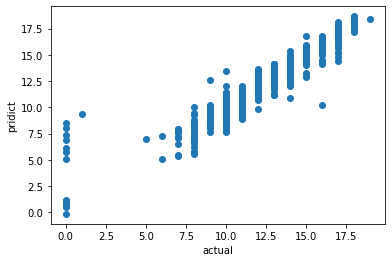

In [103]:
import matplotlib.pyplot as plt
plt.scatter(y_train,p1_train)
plt.xlabel("actual")
plt.ylabel("pridict")
plt.show()

In [104]:
from sklearn.metrics import r2_score

In [105]:
r2_score(y_train,p1_train)

0.8504154042188079

In [106]:
p1_test=r.predict(X_test)
p1_test

array([10.05262594, 12.89073028, 15.37722555,  9.99980104, 13.67006529,
       16.48683747,  9.11676569, 14.57066871, 15.51528588, 11.51964033,
        8.57473056,  9.35599351, 15.93161817, 13.43037942, 11.68967953,
       16.43074787, 12.8831602 , 11.19734345, 10.79980826, 13.65304222,
       15.14685641, 12.73418694, 17.60367273, 14.43607518, 12.46215741,
        7.99604021, 19.61888397,  9.3242138 , 12.40309631, 14.40273591,
       15.2754924 ,  7.52618389, 14.21976461, 17.70249773, 10.54461022,
       17.6633046 , 14.68144729, 13.29141453, 10.38252519,  6.70194436,
       14.78941521, 10.49660125, 10.30928671, 15.51162158,  8.58147543,
        7.46840945, 12.9669733 , 12.28947792,  8.50445575, 13.22888915,
       14.66450342,  9.31320019, 10.96947757, 10.22383057, 11.76233319,
        7.12674603, 11.33718624,  8.37778561, 16.09539552,  9.61490444,
       12.60045965,  9.34463084, 14.38547115, 13.15567724, 12.20256888,
       17.60669003, 18.04671305, 11.98663979, 11.33378774,  8.83

In [107]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':p1_test})
predictions.head()

,y_test,y_hat
482,9,10.052626
167,13,12.890730
339,15,15.377226
350,11,9.999801
390,14,13.670065


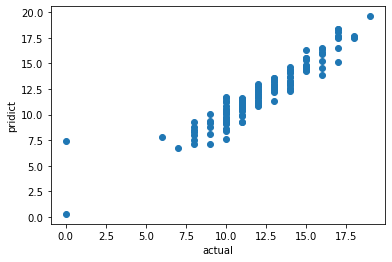

In [109]:
import matplotlib.pyplot as plt
plt.scatter(y_test,p1_test)
plt.xlabel("actual")
plt.ylabel("pridict")
plt.show()

In [110]:
from sklearn.metrics import r2_score

In [111]:
r2_score(y_test,p1_test)

0.8803963017535749

In [112]:
from sklearn import metrics

In [113]:
print(metrics.mean_absolute_error(y_test, p1_test))
print(metrics.mean_squared_error(y_test, p1_test))
print(np.sqrt(metrics.mean_squared_error(y_test, p1_test)))

0.7401145052366878
1.1575090219167044
1.075875932399598


# SVR

In [127]:
# Import libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [128]:
# Create the SVR model
model = SVR()
model.fit(X_train,y_train)

SVR()

In [129]:
# Predicting the Test set results
y_hat = model.predict(X_test)


In [130]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
482,9,10.015636
167,13,13.562910
339,15,15.262372
350,11,10.437456
390,14,13.916401


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


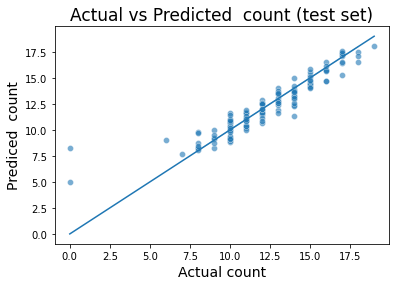

In [133]:
sns.scatterplot(x=y_test, y=y_hat, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

In [134]:
model.score(X_test, y_test)

0.8571949315192033

In [135]:
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
print(RMSE_test)
print(MSE_test)
print(metrics.mean_absolute_error(y_test, y_hat))

1.17
1.38
0.742996056110151


# Tuning hyperparameters:



In [136]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [139]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
# verbose just means the text output describing the process. (the greater the number the more detail you will get).

In [141]:
grid.fit(x_val,y_val)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [142]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [143]:
grid.best_estimator_

SVR(C=100, gamma=0.01)

In [145]:
y_hat_optimized = grid.predict(X_test)

predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat,'y_hat_optimized':y_hat_optimized})
predictions.head()

,y_test,y_hat,y_hat_optimized
482,9,10.015636,8.241295
167,13,13.562910,12.922618
339,15,15.262372,16.449625
350,11,10.437456,8.564247
390,14,13.916401,13.882668


/Users/mac/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


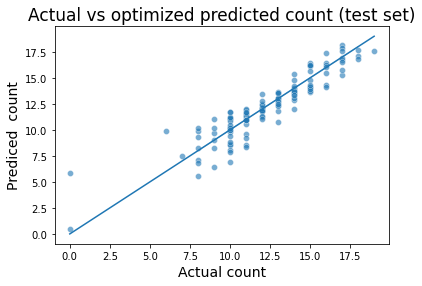

In [146]:
sns.scatterplot(x=y_test, y=y_hat_optimized, alpha=0.6)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs optimized predicted count (test set)', fontsize=17)
plt.show()

In [148]:
grid.score(x_val, y_val)

0.9991575240449757

In [149]:
MSE_test_opt = round(np.mean(np.square(y_test - y_hat_optimized)),2)
RMSE_test_opt = round(np.sqrt(MSE_test_opt),2)
print(RMSE_test_opt)
print(MSE_test_opt)


1.24
1.53


# Cross validation

In [151]:
from sklearn.model_selection import cross_val_score

In [154]:
NMSE = cross_val_score(estimator = SVR(C=10, gamma=0.01), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )



In [155]:
MSE_CV = round(np.mean(-NMSE),4)
RMSE_CV = round(np.sqrt(MSE_CV),4)
RMSE_CV

1.4025

# Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor

In [157]:
rf = RandomForestRegressor ()

In [158]:
rf.fit (X_train, y_train)

RandomForestRegressor()

In [159]:
y_pred = rf.predict (X_test)
y_pred 

array([ 9.97, 13.11, 15.41,  9.99, 13.13, 16.15,  9.63, 15.01, 15.43,
       11.58,  8.42,  8.81, 16.37, 13.14, 11.35, 16.3 , 12.47, 11.24,
       11.68, 13.23, 15.29, 12.66, 17.82, 15.02, 13.61,  7.76, 18.04,
        9.27, 13.  , 14.59, 15.61,  4.64, 12.92, 17.88, 10.37, 17.53,
       15.14, 13.09, 10.45,  7.66, 14.88, 10.33,  9.49, 15.36,  8.27,
        7.14, 12.37, 13.33,  5.22, 12.89, 14.35, 10.08, 11.67, 10.44,
       11.02,  7.94, 11.44,  8.94, 16.4 ,  9.27, 12.73,  9.23, 14.11,
       12.71, 12.32, 17.48, 17.95, 12.61, 11.31,  9.25, 11.1 ,  9.43,
        9.45, 17.69, 13.21, 16.15,  9.53, 13.17,  9.83, 18.21, 14.19,
       11.68, 12.73, 13.08, 17.71, 10.44, 11.81, 11.36, 14.51, 16.32,
       14.92,  9.43, 11.35, 12.75, 12.9 ,  6.64, 11.84, 12.45,  4.85,
       11.35, 17.09, 12.9 , 10.42, 12.29, 15.52, 11.28,  8.02, 11.14,
       12.38, 13.1 , 11.48,  9.73,  9.35, 12.51, 11.15,  1.24, 11.15,
       13.29, 10.45,  5.27, 10.8 ,  6.12, 12.73, 12.69, 15.05,  9.52,
        7.9 , 10.76,

In [160]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.5636607692307696

In [161]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.2504642214916706

In [164]:
# Use the best set of parameters to make predictions on the test data
y_hat = rf.predict(X_test)
y_hat_optimized = grid.predict(X_test)
predictions1 = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat,'y_hat_optimized':y_hat_optimized})
predictions1.head()

,y_test,y_hat,y_hat_optimized
482,9,9.97,8.241295
167,13,13.11,12.922618
339,15,15.41,16.449625
350,11,9.99,8.564247
390,14,13.13,13.882668


In [171]:
# Define the parameter values to try
param_grid = {'n_estimators': [10, 100, 1000], 'max_depth': [2, 4, 6, 8]}

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100)

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(x_val, y_val)

# Get the best set of parameters
print(grid_search.best_params_)


# Calculate the mean squared
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')


{'max_depth': 8, 'n_estimators': 100}
Mean Squared Error: 1.56
R2 Score: 0.84


SVR: MSE = 1.53, R2 = 0.84


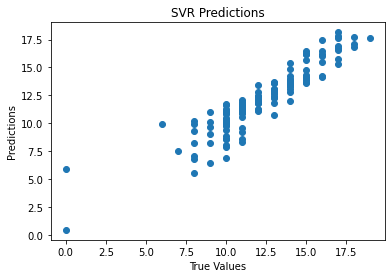

Random Forest: MSE = 1.35, R2 = 0.86


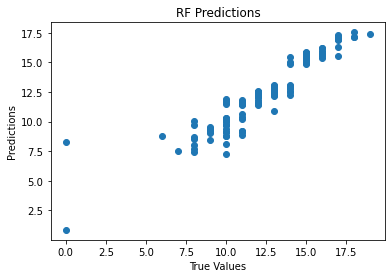

Random Forest is the better model


In [172]:

# Train and evaluate the SVR model
model_svr = SVR()
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}
grid_search_svr = GridSearchCV(estimator=model_svr, param_grid=param_grid_svr, cv=5)
grid_search_svr.fit(x_val, y_val)
y_pred_svr = grid_search_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVR: MSE = {mse_svr:.2f}, R2 = {r2_svr:.2f}')
 # Plot the SVR predictions
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('SVR Predictions')
plt.show()

# Train and evaluate the Random Forest model
model_rf = RandomForestRegressor()
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(x_val, y_val)
y_pred_rf = grid_search_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest: MSE = {mse_rf:.2f}, R2 = {r2_rf:.2f}')
# Plot the rf predictions
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RF Predictions')
plt.show()
# Compare the performance of the two models
if mse_svr < mse_rf:
    print('SVR is the better model')
else:
    print('Random Forest is the better model')